# customer churn prediction analysis

# data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dfx=pd.read_excel(r"C:\Users\kusar\Downloads\customer_churn_large_dataset.xlsx")
df=pd.DataFrame(dfx)
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [3]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [4]:
df.shape

(100000, 9)

In [5]:
df.describe(include='all')

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000,100000.000000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,100000,NaN,2,5,NaN,NaN,NaN,NaN
top,NaN,Customer_1,NaN,Female,Houston,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,50216,20157,NaN,NaN,NaN,NaN
mean,50000.500000,NaN,44.027020,NaN,NaN,12.490100,65.053197,274.393650,0.497790
std,28867.657797,NaN,15.280283,NaN,NaN,6.926461,20.230696,130.463063,0.499998
min,1.000000,NaN,18.000000,NaN,NaN,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,NaN,31.000000,NaN,NaN,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,NaN,44.000000,NaN,NaN,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,NaN,57.000000,NaN,NaN,19.000000,82.640000,387.000000,1.000000


In [6]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [7]:
df.dtypes

CustomerID                    float64
Name                           object
Age                           float64
Gender                         object
Location                       object
Subscription_Length_Months    float64
Monthly_Bill                  float64
Total_Usage_GB                float64
Churn                         float64
dtype: object

<AxesSubplot:>

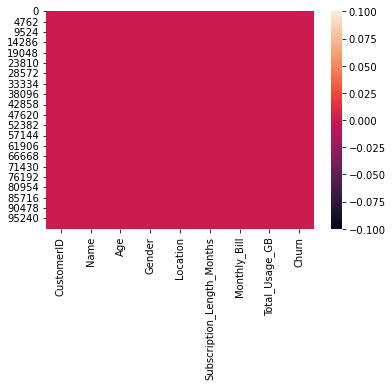

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.skew()

CustomerID                    0.000000
Age                          -0.002689
Subscription_Length_Months   -0.001655
Monthly_Bill                 -0.000326
Total_Usage_GB                0.007113
Churn                         0.008840
dtype: float64

In [10]:
df.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


<AxesSubplot:>

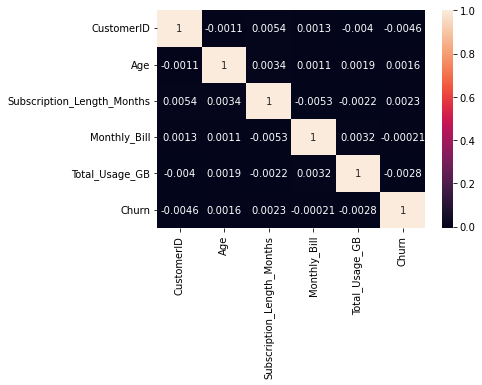

In [11]:
sns.heatmap(df.corr(),annot=True)

Female    50216
Male      49784
Name: Gender, dtype: int64

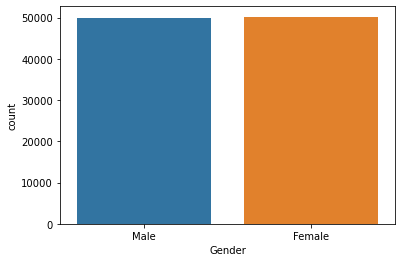

In [12]:
sns.countplot(df['Gender'])
df['Gender'].value_counts()

In [13]:
df1=df.drop(['Name'],axis=1)
df1.head()

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [14]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df1['Gender']=lab.fit_transform(df1['Gender'])
df1['Location']=lab.fit_transform(df1['Location'])
df1

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,63.0,1,2,17.0,73.36,236.0,0.0
1,2.0,62.0,0,4,1.0,48.76,172.0,0.0
2,3.0,24.0,0,2,5.0,85.47,460.0,0.0
3,4.0,36.0,0,3,3.0,97.94,297.0,1.0
4,5.0,46.0,0,3,19.0,58.14,266.0,0.0
...,...,...,...,...,...,...,...,...
99995,99996.0,33.0,1,1,23.0,55.13,226.0,1.0
99996,99997.0,62.0,0,4,19.0,61.65,351.0,0.0
99997,99998.0,64.0,1,0,17.0,96.11,251.0,1.0
99998,99999.0,51.0,0,4,20.0,49.25,434.0,1.0


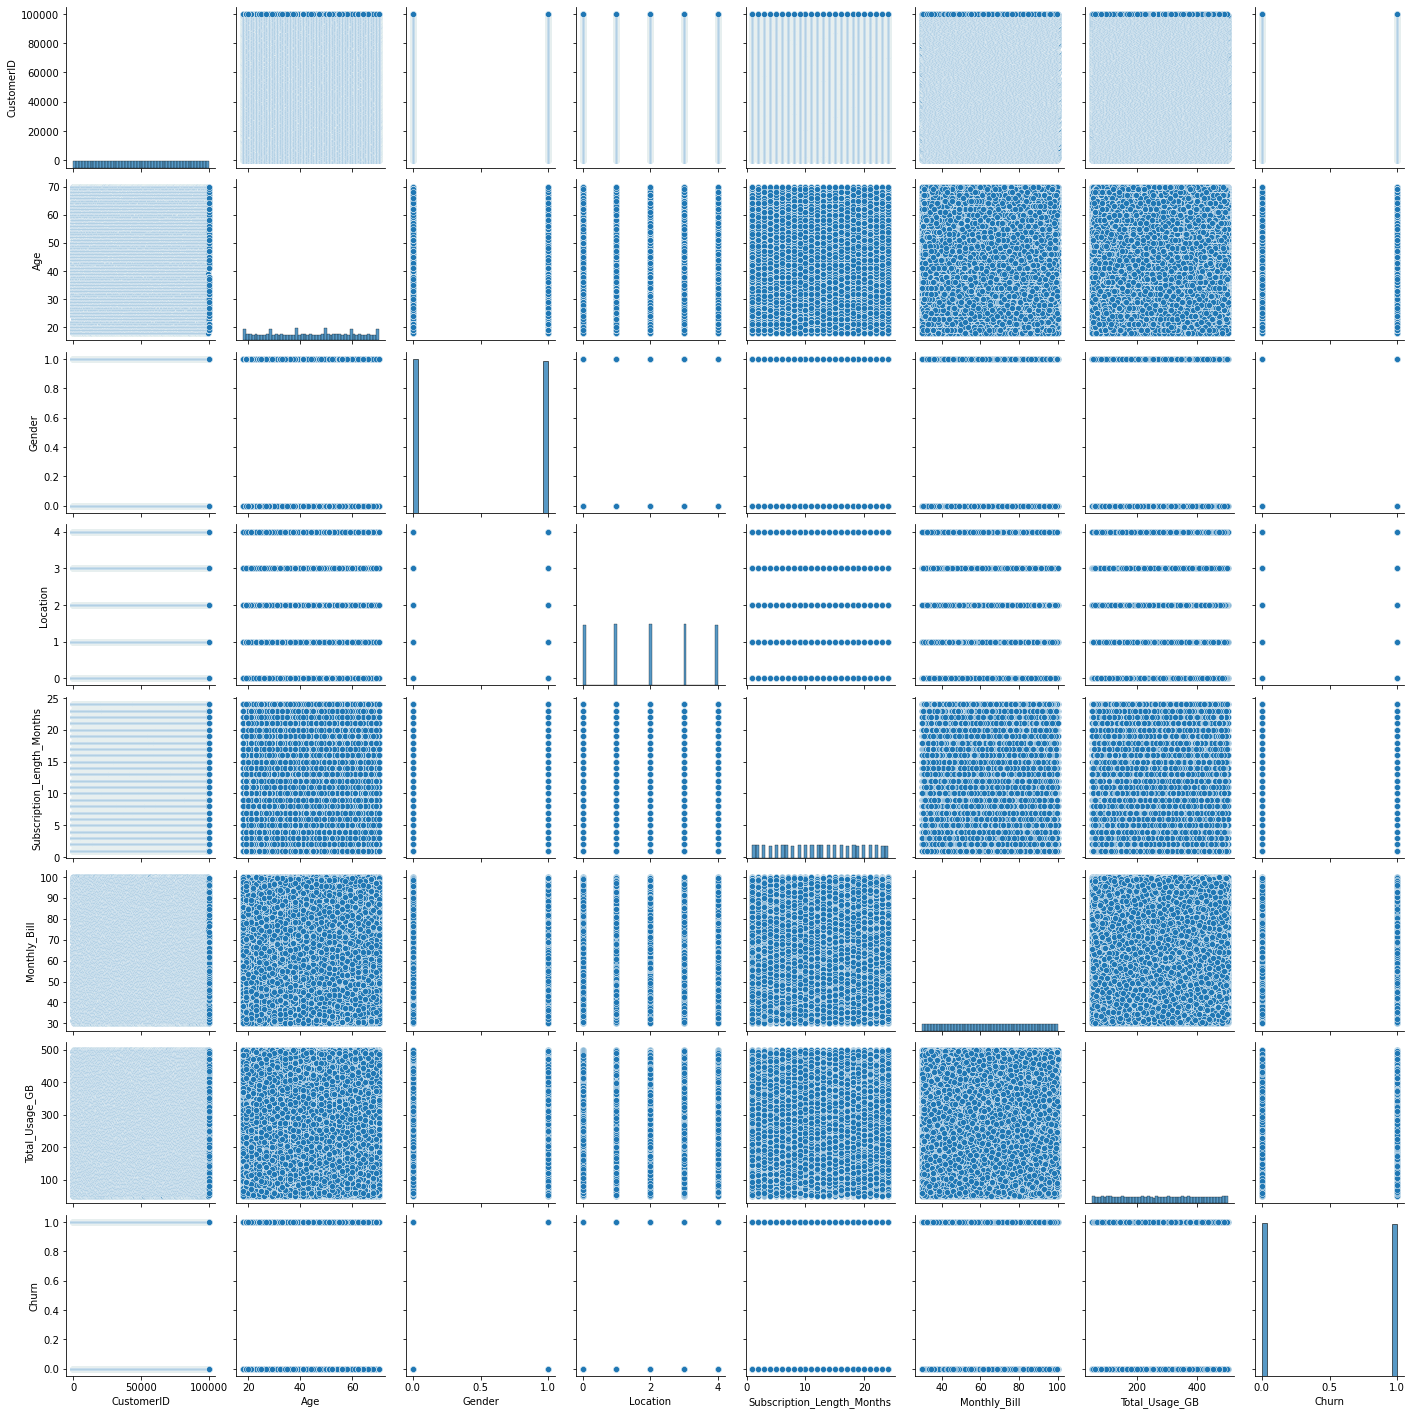

In [121]:
sns.pairplot(df1)

CustomerID                       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Age                           AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Gender                        AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Location                      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Subscription_Length_Months          AxesSubplot(0.125,0.125;0.168478x0.343182)
Monthly_Bill                     AxesSubplot(0.327174,0.125;0.168478x0.343182)
Total_Usage_GB                   AxesSubplot(0.529348,0.125;0.168478x0.343182)
Churn                            AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

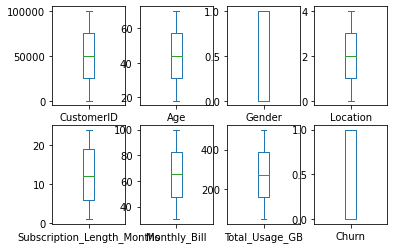

In [15]:
df1.plot(kind='box',subplots=True,layout=(2,4))

we can clearly observe that there is no outliers but later we are going to use zscore to find out if there is any outliers

In [16]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.732033,1.241670,1.004329,0.002947,0.651115,0.410606,0.294289,0.99559
1,1.731999,1.176226,0.995689,1.419748,1.658879,0.805374,0.784852,0.99559
2,1.731964,1.310651,0.995689,0.002947,1.081380,1.009204,1.422681,0.99559
3,1.731930,0.525321,0.995689,0.711347,1.370129,1.625597,0.173279,1.00443
4,1.731895,0.129120,0.995689,0.711347,0.939864,0.341720,0.064338,0.99559
...,...,...,...,...,...,...,...,...
99995,1.731895,0.721654,1.004329,0.705453,1.517363,0.490504,0.370939,1.00443
99996,1.731930,1.176226,0.995689,1.419748,0.939864,0.168220,0.587191,0.99559
99997,1.731964,1.307115,1.004329,1.413854,0.651115,1.535140,0.179313,1.00443
99998,1.731999,0.456341,0.995689,1.419748,1.084239,0.781153,1.223390,1.00443


In [17]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


removing outliers using zscore of stats model

In [18]:
threshold=3
new_df=df1[(z<3).all(axis=1)]
new_df

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,63.0,1,2,17.0,73.36,236.0,0.0
1,2.0,62.0,0,4,1.0,48.76,172.0,0.0
2,3.0,24.0,0,2,5.0,85.47,460.0,0.0
3,4.0,36.0,0,3,3.0,97.94,297.0,1.0
4,5.0,46.0,0,3,19.0,58.14,266.0,0.0
...,...,...,...,...,...,...,...,...
99995,99996.0,33.0,1,1,23.0,55.13,226.0,1.0
99996,99997.0,62.0,0,4,19.0,61.65,351.0,0.0
99997,99998.0,64.0,1,0,17.0,96.11,251.0,1.0
99998,99999.0,51.0,0,4,20.0,49.25,434.0,1.0


# feature engineering

In [19]:
dfx=new_df.iloc[:,0:7]
dfx

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1.0,63.0,1,2,17.0,73.36,236.0
1,2.0,62.0,0,4,1.0,48.76,172.0
2,3.0,24.0,0,2,5.0,85.47,460.0
3,4.0,36.0,0,3,3.0,97.94,297.0
4,5.0,46.0,0,3,19.0,58.14,266.0
...,...,...,...,...,...,...,...
99995,99996.0,33.0,1,1,23.0,55.13,226.0
99996,99997.0,62.0,0,4,19.0,61.65,351.0
99997,99998.0,64.0,1,0,17.0,96.11,251.0
99998,99999.0,51.0,0,4,20.0,49.25,434.0


In [20]:
dfy=new_df.iloc[:,-1]
dfy

0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
99995    1.0
99996    0.0
99997    1.0
99998    1.0
99999    1.0
Name: Churn, Length: 100000, dtype: float64

0.0    50221
1.0    49779
Name: Churn, dtype: int64

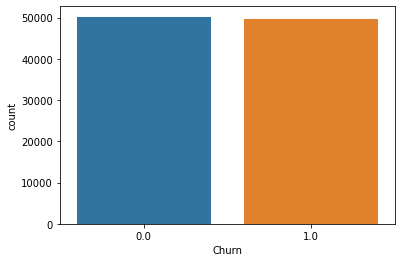

In [21]:
sns.countplot(dfy)
dfy.value_counts()

balancing the imbalanced dataset using smote model

In [22]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(dfx,dfy)
trainy.value_counts()

0.0    50221
1.0    50221
Name: Churn, dtype: int64

In [23]:
trainy

0         0.0
1         0.0
2         0.0
3         1.0
4         0.0
         ... 
100437    1.0
100438    1.0
100439    1.0
100440    1.0
100441    1.0
Name: Churn, Length: 100442, dtype: float64

In [24]:
trainx

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1.000000,63.000000,1,2,17.000000,73.360000,236.000000
1,2.000000,62.000000,0,4,1.000000,48.760000,172.000000
2,3.000000,24.000000,0,2,5.000000,85.470000,460.000000
3,4.000000,36.000000,0,3,3.000000,97.940000,297.000000
4,5.000000,46.000000,0,3,19.000000,58.140000,266.000000
...,...,...,...,...,...,...,...
100437,69855.148207,23.565095,0,1,9.747924,38.738811,398.121887
100438,37023.104189,60.270679,0,2,14.146075,31.861419,302.209433
100439,56961.204654,39.757518,0,1,12.467184,68.669268,96.280310
100440,12652.117839,38.289697,0,2,14.942714,56.967232,73.703768


0.0    50221
1.0    50221
Name: Churn, dtype: int64

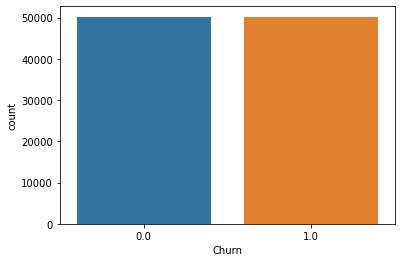

In [25]:
sns.countplot(trainy)
trainy.value_counts()

In [26]:
from sklearn.model_selection import train_test_split

In [82]:
train_x,test_x,train_y,test_y=train_test_split(trainx,trainy,test_size=.30,random_state=45)

In [83]:
train_x.shape

(70309, 7)

In [84]:
train_y.shape

(70309,)

# model builing

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

lg=LogisticRegression()
gnb=GaussianNB()
dnb=DecisionTreeClassifier()


model=[lg,gnb,dnb]

for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    pred=m.predict(test_x)
    print('accuracy_score:',accuracy_score(test_y,pred))
    print('conf_matrix:',confusion_matrix(test_y,pred))
    print('clas_report:',classification_report(test_y,pred))

accuracy_score: 0.49981747585703384
conf_matrix: [[15056     5]
 [15067     5]]
clas_report:               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     15061
         1.0       0.50      0.00      0.00     15072

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.33     30133
weighted avg       0.50      0.50      0.33     30133

accuracy_score: 0.5002820827664023
conf_matrix: [[8137 6924]
 [8134 6938]]
clas_report:               precision    recall  f1-score   support

         0.0       0.50      0.54      0.52     15061
         1.0       0.50      0.46      0.48     15072

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.50     30133
weighted avg       0.50      0.50      0.50     30133

accuracy_score: 0.49606743437427403
conf_matrix: [[7432 7629]
 [7556 7516]]
clas_report:               precision    recall  f1-score   support

         0.0       0.

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)
knn.score(train_x,train_y)

predk=knn.predict(test_x)
print(accuracy_score(test_y,predk))
print(confusion_matrix(test_y,predk))
print(classification_report(test_y,predk))

0.5016095310788836
[[7535 7526]
 [7492 7580]]
              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50     15061
         1.0       0.50      0.50      0.50     15072

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.50     30133
weighted avg       0.50      0.50      0.50     30133



In [87]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(train_x,train_y)
predr=rf.predict(test_x)
print(accuracy_score(test_y,predr))
print(confusion_matrix(test_y,predr))

print(classification_report(test_y,predr))

0.5022400690273122
[[7886 7175]
 [7824 7248]]
              precision    recall  f1-score   support

         0.0       0.50      0.52      0.51     15061
         1.0       0.50      0.48      0.49     15072

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.50     30133
weighted avg       0.50      0.50      0.50     30133



In [88]:
from sklearn.naive_bayes import MultinomialNB
mbl=MultinomialNB()
mbl.fit(train_x,train_y)
predm=mbl.predict(test_x)
print(accuracy_score(test_y,predm))
print(confusion_matrix(test_y,predm))
print(classification_report(test_y,predm))

0.49686390336176284
[[7535 7526]
 [7635 7437]]
              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50     15061
         1.0       0.50      0.49      0.50     15072

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.50     30133
weighted avg       0.50      0.50      0.50     30133



# model optimization

In [123]:
from sklearn.model_selection import cross_val_score
score_croc=cross_val_score(gnb,dfx,dfy,cv=5)
print(score_croc)
print(score.mean())
print(score.std())

[0.5007  0.50765 0.50645 0.5008  0.50315]
0.5037499999999999
0.0028588459209967854


In [90]:
from sklearn.ensemble import AdaBoostClassifier
mbl=DecisionTreeClassifier(criterion='gini')
ad=AdaBoostClassifier(n_estimators=50,base_estimator=mbl)
ad.fit(train_x,train_y)
preda=ad.predict(test_x)
print(accuracy_score(test_y,preda))
print(confusion_matrix(test_y,preda))

print(classification_report(test_y,preda))

0.49543689642584543
[[7382 7679]
 [7525 7547]]
              precision    recall  f1-score   support

         0.0       0.50      0.49      0.49     15061
         1.0       0.50      0.50      0.50     15072

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.50     30133
weighted avg       0.50      0.50      0.50     30133



# hyperparameter tuning

In [120]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()

grid_param ={'criterion': ["gini", "entropy"]}

gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param, scoring='accuracy',cv=5)

gd_sr.fit(train_x,train_y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result =gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.5032214959200415


here we can observe we have used different models,optimization techniques and validation techniques but cross validation score with guassian naive bayes gives best prediction 

In [131]:
import joblib
joblib.dump(score_croc, "score_crocfile.obj")

# Load the trained model
loaded_model = joblib.load("score_crocfile.obj")



In [ ]:
# Now, you can use the loaded_model to make predictions on new customer data
new_customer_data = pd.DataFrame({
    'Feature1': [(input('enter value1'))],
    'Feature2': [(input('enter value2'))],
    # Add other features here
})

# Apply the same scaling to the new data
new_customer_data_scaled = scaler.transform(new_customer_data)

# Make churn predictions for the new customer data
churn_prediction = model.predict(new_customer_data_scaled)

print("Churn Prediction for New Customer:", churn_prediction)

here above code is to enter new values that can be saved into above file